# IRIS FLOWER CLASSIFICATION 


**By-Sparsh Jain**

**IMPORT IMPORTANT MODULES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the data**

In [3]:
data = pd.read_csv(r"D:\sparsh\Iris.csv")

The attributes which help us to reach our target are 
1. Sepal Length in cm
2. Sepal Width in cm
3. Petal Length in cm
4. Petal Width in cm
and our target variable is Species

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data = data.drop('Id', axis=1)

**To get the statistics of data**

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Information of the data**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**If we want to know that for each sample how many flowers do we have**

In [8]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#checking for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Visualising the Data**

<AxesSubplot:>

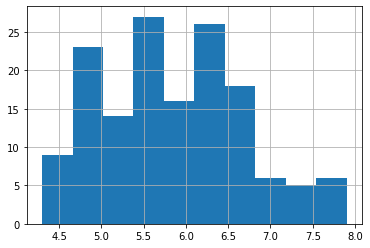

In [10]:
data['SepalLengthCm'].hist()

<AxesSubplot:>

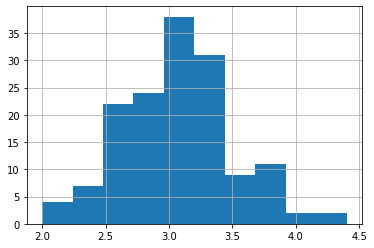

In [11]:
data['SepalWidthCm'].hist()

**Conclusion - A perfect Normal Distribution**

<AxesSubplot:>

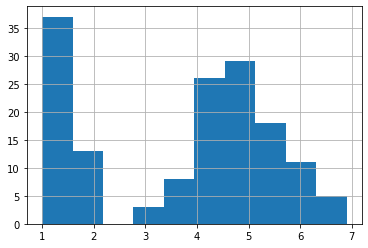

In [12]:
data['PetalLengthCm'].hist()

<AxesSubplot:>

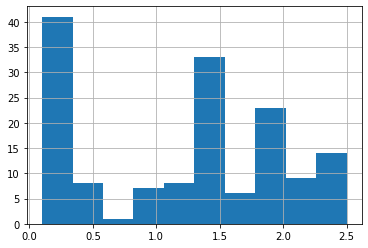

In [13]:
data['PetalWidthCm'].hist()

**By looking at last and second last histogram it can be said that one species is totally seperable hence lets confirm it with another type of visualisation** 

In [14]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
color = ['red','blue', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

**Plotting the scatter plot between the species length and species width**

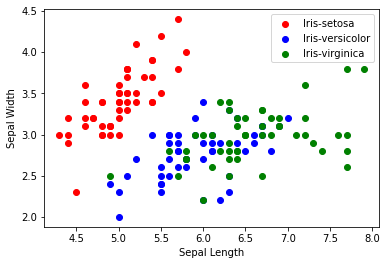

In [16]:
for i in range(3):
    x = data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = color[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

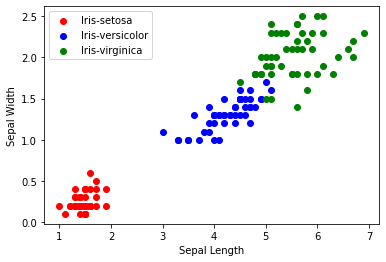

In [17]:
for i in range(3):
    x = data[data['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = color[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

**Here it proves that one class is totally seperable from one another which is Iris-sentosa**

**Correlation**

<AxesSubplot:>

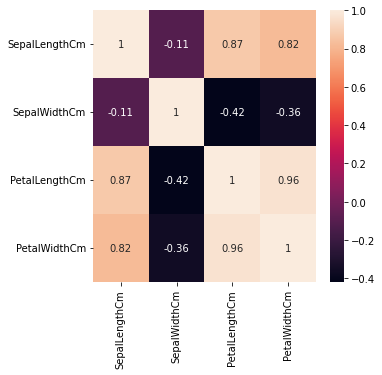

In [18]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

**now we need to label the strings into the numeric form so that the data can be trained**

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
data['Species'] = le.fit_transform(data['Species'])

In [22]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [23]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
from sklearn.model_selection import train_test_split
x = data.drop('Species', axis=1)
y = data['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**TRAINING THE MODEL**

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [43]:
print("Accuracy", model.score(x_test, y_test))

Accuracy 1.0


**as we got the accuracy as 100 percent hence lets train the data in the logistic regression**

In [44]:
y = np.array(y)

In [45]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
sc.transform(x)

array([[-9.29929724e-01,  1.04140528e+00, -1.36612302e+00,
        -1.33225650e+00],
       [-1.17464807e+00, -1.04795500e-01, -1.36612302e+00,
        -1.33225650e+00],
       [-1.41936642e+00,  3.53684814e-01, -1.42299967e+00,
        -1.33225650e+00],
       [-1.54172560e+00,  1.24444657e-01, -1.30924637e+00,
        -1.33225650e+00],
       [-1.05228890e+00,  1.27064544e+00, -1.36612302e+00,
        -1.33225650e+00],
       [-5.62852202e-01,  1.95836591e+00, -1.19549306e+00,
        -1.07102974e+00],
       [-1.54172560e+00,  8.12165128e-01, -1.36612302e+00,
        -1.20164312e+00],
       [-1.05228890e+00,  8.12165128e-01, -1.30924637e+00,
        -1.33225650e+00],
       [-1.78644394e+00, -3.34035657e-01, -1.36612302e+00,
        -1.33225650e+00],
       [-1.17464807e+00,  1.24444657e-01, -1.30924637e+00,
        -1.46286989e+00],
       [-5.62852202e-01,  1.49988560e+00, -1.30924637e+00,
        -1.33225650e+00],
       [-1.29700725e+00,  8.12165128e-01, -1.25236972e+00,
      

In [48]:
le = LogisticRegression()
le.fit(x,y)
import joblib
joblib.dump(le, 'iris')
model= joblib.load('iris')
model.predict(sc.transform([[4.5,1.2,2.4,3.0]]))

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])